# **Color Enhancement**

As a photographer working with a landscape series, I want to automatically enhance the colors and contrast of my photos, So that I can make the images more vivid and visually striking, bringing out the true beauty of the scenery.


This user story focuses on color enhancement techniques. You should take the provided image and apply two different enhancement methods:

Contrast Enhancement: You should implement histogram equalization. You can perform this on the grayscale version of the image or on the V-channel of the HSV color space to enhance the overall brightness and contrast without affecting the hue.


Saturation Enhancement: You should increase the saturation of the image. This can be done by converting the image to the HSV (Hue, Saturation, Value) color space, multiplying the Saturation channel by a factor (e.g., 1.5), and then converting the image back to RGB. You should handle potential value clipping (values exceeding 255) to avoid unwanted artifacts.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL as Image

In [2]:
forest = cv2.imread(r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\Typical_New_Zealand_scenic_walk_view.jpg")

In [3]:
forest.shape

(1456, 2592, 3)

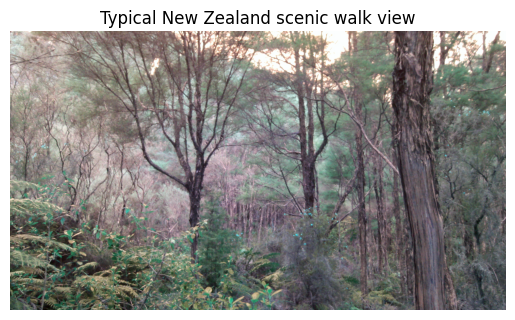

In [4]:
plt.imshow(forest)
plt.title('Typical New Zealand scenic walk view')
plt.axis('off')
plt.show()

# **Contrast Enhancement: You should implement histogram equalization. You can perform this on the grayscale version of the image or on the V-channel of the HSV color space to enhance the overall brightness and contrast without affecting the hue**

# **Histogram equalization**

In [5]:
Gray_forest = cv2.cvtColor(forest, cv2.COLOR_BGR2GRAY)

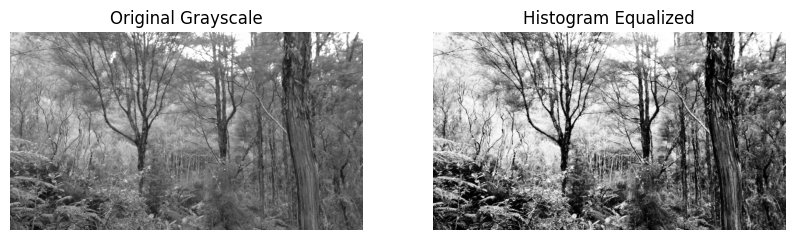

In [6]:
equalized_img = cv2.equalizeHist(Gray_forest)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Grayscale')
plt.imshow(Gray_forest, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram Equalized')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.show()

In [24]:
alpha = 2
beta = 20
adjusted_img = cv2.convertScaleAbs(forest, alpha=alpha, beta=beta)

In [25]:
hsv_image = cv2.cvtColor(adjusted_img , cv2.COLOR_RGB2HSV)

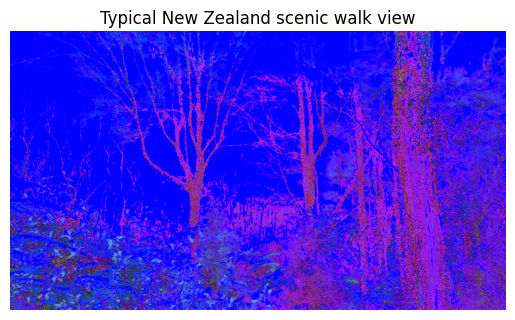

In [27]:
plt.imshow(hsv_image)
plt.title('Typical New Zealand scenic walk view')
plt.axis('off')
plt.show()

In [28]:
hsv_image[:,:,2] = cv2.equalizeHist(hsv_image[:,:,2])

In [29]:
equalized_img = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

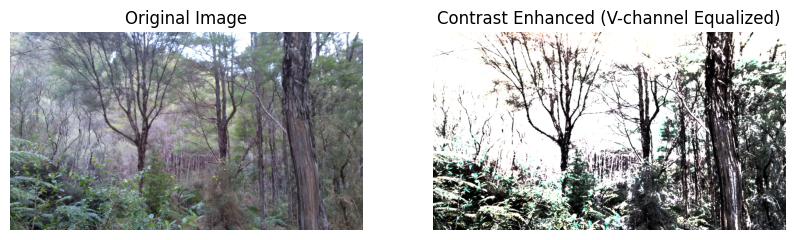

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(forest, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contrast Enhanced (V-channel Equalized)')
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

#### **Saturation Enhancement: You should increase the saturation of the image. This can be done by converting the image to the HSV (Hue, Saturation, Value) color space, multiplying the Saturation channel by a factor (e.g., 1.5), and then converting the image back to RGB. You should handle potential value clipping (values exceeding 255) to avoid unwanted artifacts**

In [63]:
factor = 1.5
hsv_image[:, :, 1] = hsv_image[:, :, 1] * factor

In [64]:
hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1], 0, 255)

In [65]:
hsv_image = hsv_image.astype(np.uint8)

In [66]:
saturated_img = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

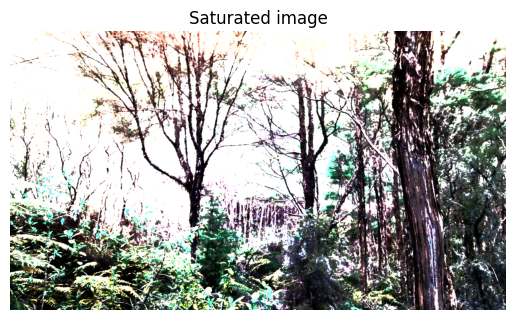

In [67]:
plt.imshow(saturated_img)
plt.title('Saturated image')
plt.axis('off')
plt.show()